In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/yathi/GitRepos/DataScienceLearning/DataSets/income.csv")

In [3]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [4]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(df[['Age','Income($)']])

C:\Users\yathi\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\yathi\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\yathi\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\yathi\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

KMeans(n_clusters=3)

In [5]:
y_pred = model.predict(df[['Age','Income($)']])

In [6]:
y_pred

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [7]:
df['Clusters'] = y_pred

<Axes: xlabel='Age', ylabel='Income($)'>

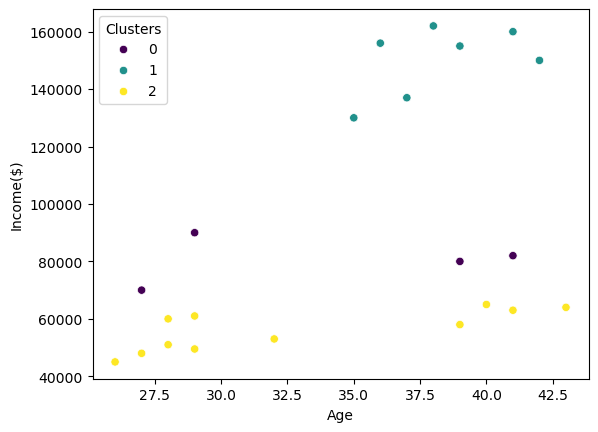

In [8]:
sns.scatterplot(data=df,x='Age',y='Income($)',hue='Clusters',palette='viridis')

In [9]:
df.head()

,Name,Age,Income($),Clusters
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age','Income($)']] = scaler.fit_transform(df[['Age','Income($)']])

In [11]:
df.head()

,Name,Age,Income($),Clusters
0,Rob,-1.356055,-0.480684,0
1,Michael,-1.009157,-0.010159,0
2,Mohan,-1.009157,-0.692421,2
3,Ismail,-1.182606,-0.715947,2
4,Kory,1.245679,1.401417,1


In [12]:
model = KMeans(n_clusters=3)
model.fit(df[['Age','Income($)']])
y_pred = model.predict(df[['Age','Income($)']])
df['Clusters'] = y_pred

C:\Users\yathi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: xlabel='Age', ylabel='Income($)'>

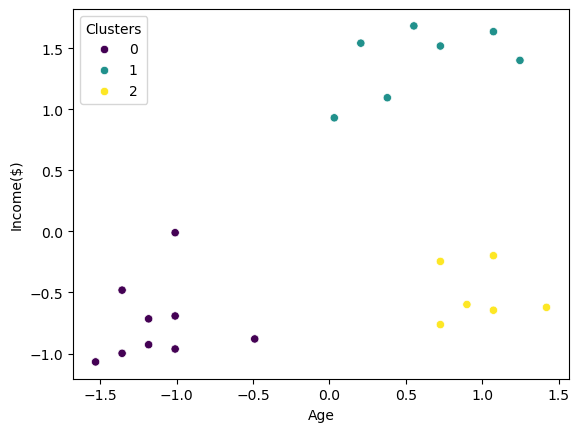

In [13]:
sns.scatterplot(data=df,x='Age',y='Income($)',hue='Clusters',palette='viridis')

In [14]:
# elbow method

sse = []
for i in range(1,11):
  model = KMeans(n_clusters=i)
  model.fit_predict(df[['Age','Income($)']])
  sse.append(model.inertia_)
print(sse)

[43.99999999999999, 16.194890274706772, 3.889308657130143, 3.6419131288861526, 2.2002272908434257, 1.8378768082819057, 1.3782407911524641, 1.1831615471216224, 0.9385195182931068, 0.884322300969122]


C:\Users\yathi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yathi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yathi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yathi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

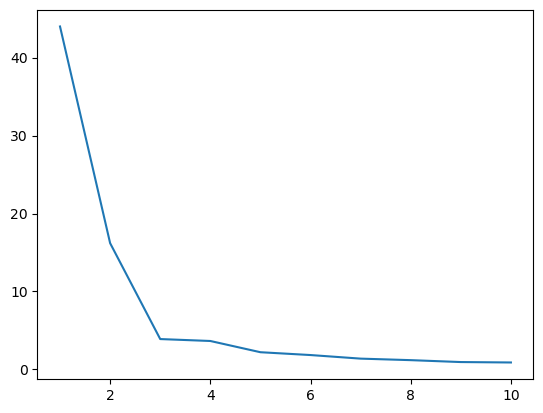

In [15]:
import matplotlib.pyplot as plt
k = range(1,11)
plt.plot(k,sse)